In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [9]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# In this case we are going to proceed with clustering only based on Annual income and spending score for example

In [11]:
#dataset
X=data[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


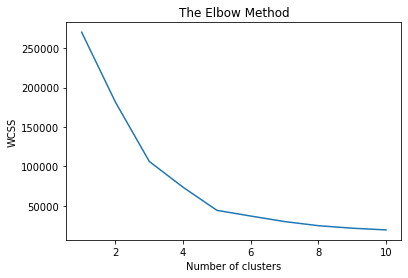

In [13]:
#Elbow method

from sklearn.cluster import KMeans

wcss=[]  #within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS denotes within cluster sum of squares of distance, that implies, distance of points from centroid in that cluster. this is also called inertia
Having one cluster doesnt make sense, so eg consider two clusters then the intertia falls to somwhere near 20000 and four clusters it falls somewhere between 50000-100000 and so on. The increase in no of cluster decreases the wcss or intertia.

From above the biggest dip can be considered as the elbow point, here in this case consider it to be 5.
For number of cluster from 1-5 it can be seen that WCSS is very high with significant difference. and from 6-10 it can be observed that the differenc is very low or not much. 

given No of clusters to be 5 it can be observed that it is a perfect change point for trend and can be considered as Elbow point.



In [14]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
#clustering taking the no of clusters as 5

kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### Model Evaluation
using metrics

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(X,y_kmeans)

0.553931997444648

### Sample Prediction

In [21]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
#It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[15,81]]))
test[0]

#Annual income 15k $ and spending score 81 belongs to cluster 3

3

In [25]:
test=kmeans.predict([[15,39]])
test[0]

#Annual income 15k $ and spending score 39 belongs to cluster 2

2

In [28]:
#Keep same cluster customers in seperate dataset
cluster_4_customers=X[y_kmeans==4]  #here X is the data set and [y_kmeans is a condition which clusters and seperates]
print(cluster_4_customers)

     Annual Income (k$)  Spending Score (1-100)
123                  69                      91
125                  70                      77
127                  71                      95
129                  71                      75
131                  71                      75
133                  72                      71
135                  73                      88
137                  73                      73
139                  74                      72
141                  75                      93
143                  76                      87
145                  77                      97
147                  77                      74
149                  78                      90
151                  78                      88
153                  78                      76
155                  78                      89
157                  78                      78
159                  78                      73
161                  79                 

#Visualising the clusters

plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'],X[y_kmeans==0]['Spending Score (1-100)'])

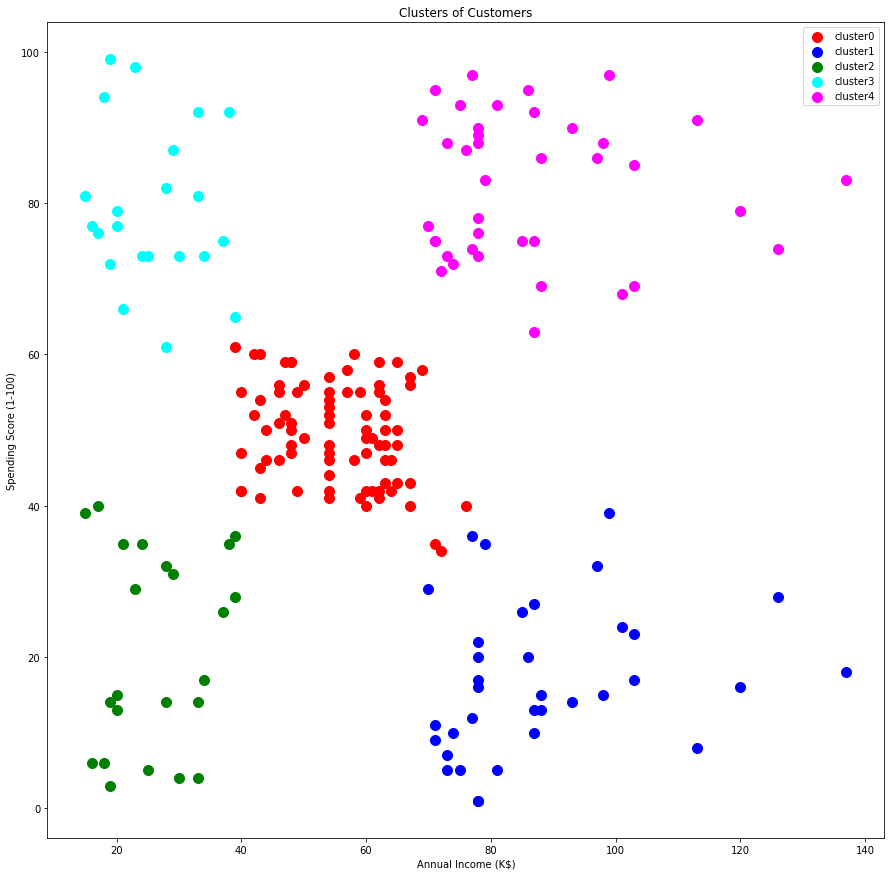

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'],X[y_kmeans==0]['Spending Score (1-100)'],s=100,c='red',label="cluster0")
plt.scatter(X[y_kmeans==1]['Annual Income (k$)'],X[y_kmeans==1]['Spending Score (1-100)'],s=100,c='blue',label="cluster1")
plt.scatter(X[y_kmeans==2]['Annual Income (k$)'],X[y_kmeans==2]['Spending Score (1-100)'],s=100,c='green',label="cluster2")
plt.scatter(X[y_kmeans==3]['Annual Income (k$)'],X[y_kmeans==3]['Spending Score (1-100)'],s=100,c='cyan',label="cluster3")
plt.scatter(X[y_kmeans==4]['Annual Income (k$)'],X[y_kmeans==4]['Spending Score (1-100)'],s=100,c='magenta',label="cluster4")

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [37]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

#### MiniBatchKMeans

* this can be used when the data set is too huge, the functionality remains the same to kMeans 
* It processes the data in batches

In [44]:
#Mini Batch KMeans

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])